# Assignment 2 (10 Marks)

Please submit this file only.

Name: Mila Cvetanovska

Student ID: 210311400

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read csv from the data folder 
df = pd.read_csv(r"C:\Users\mila_\Documents\WLU - Y3\CP321 - Data Visualization\Assignments\A2\data\energy-price.csv")
df.head(10)

,_id,Date,Ottawa,Toronto West/Ouest,Toronto East/Est,Windsor,London,Peterborough,St. Catharine's,Sudbury,...,Thunder Bay,North Bay,Timmins,Kenora,Parry Sound,Ontario Average/Moyenne provinciale,Southern Average/Moyenne du sud de l'Ontario,Northern Average/Moyenne du nord de l'Ontario,Fuel Type,Type de carburant
0,1,1990-01-03T00:00:00,55.9,49.1,48.7,45.2,50.1,0.0,0.0,56.4,...,56.6,55.1,58.1,0.0,0.0,50.3,49.5,56.2,Regular Unleaded Gasoline,Essence sans plomb
1,2,1990-01-10T00:00:00,55.9,47.7,46.8,49.7,47.6,0.0,0.0,56.4,...,56.8,55.0,58.2,0.0,0.0,49.2,48.3,56.2,Regular Unleaded Gasoline,Essence sans plomb
2,3,1990-01-17T00:00:00,55.9,53.2,53.2,49.6,53.7,0.0,0.0,55.8,...,56.8,54.4,58.2,0.0,0.0,53.6,53.3,56.0,Regular Unleaded Gasoline,Essence sans plomb
3,4,1990-01-24T00:00:00,55.9,53.2,53.5,49.0,52.1,0.0,0.0,55.7,...,56.8,54.3,58.2,0.0,0.0,53.5,53.2,56.0,Regular Unleaded Gasoline,Essence sans plomb
4,5,1990-01-31T00:00:00,55.9,51.9,52.6,48.6,49.1,0.0,0.0,55.6,...,56.8,54.2,58.1,0.0,0.0,52.5,52.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
5,6,1990-02-07T00:00:00,55.8,50.7,50.7,48.5,47.8,0.0,0.0,55.6,...,56.8,54.2,58.1,0.0,0.0,51.4,50.8,55.9,Regular Unleaded Gasoline,Essence sans plomb
6,7,1990-02-14T00:00:00,55.8,49.3,48.4,48.5,54.7,0.0,0.0,55.6,...,56.9,54.1,58.1,0.0,0.0,50.7,50.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
7,8,1990-02-21T00:00:00,55.8,48.2,47.1,48.6,53.6,0.0,0.0,55.6,...,57.0,54.0,58.1,0.0,0.0,49.9,49.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
8,9,1990-02-28T00:00:00,55.9,54.1,54.4,48.5,51.7,0.0,0.0,55.6,...,57.0,54.1,58.1,0.0,0.0,54.1,53.8,55.9,Regular Unleaded Gasoline,Essence sans plomb
9,10,1990-03-07T00:00:00,56.0,53.8,53.8,48.3,50.8,0.0,0.0,55.6,...,57.0,54.0,58.1,0.0,0.0,53.7,53.4,55.9,Regular Unleaded Gasoline,Essence sans plomb


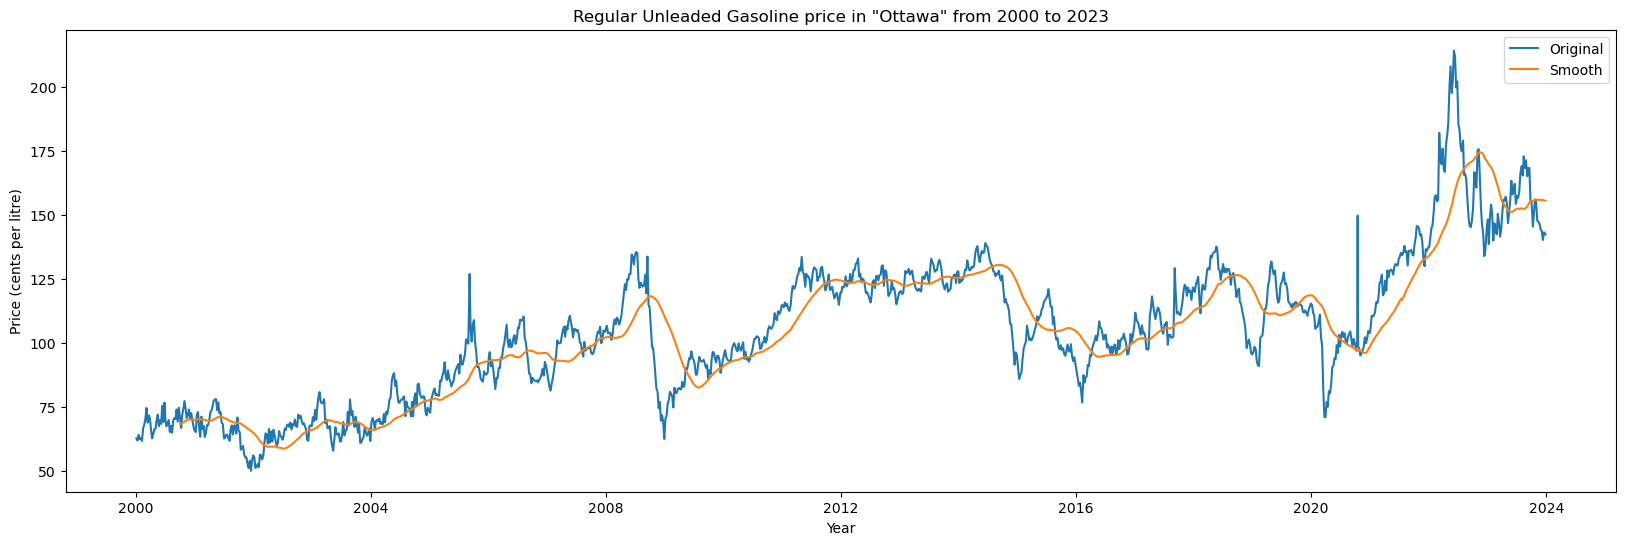

In [7]:
# Data is filtered by only the Regular Unleaded Gasoline
regular_gasoline = df[df['Fuel Type'] == 'Regular Unleaded Gasoline'].copy()

# Create a copy of the 'Date' column and convert it to datetime
regular_gasoline['Date'] = pd.to_datetime(regular_gasoline['Date'], format='%Y-%m-%dT%H:%M:%S')

# Set the 'Date' column as the index
regular_gasoline.set_index('Date', inplace=True)

# Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
regular_gasoline_sorted = regular_gasoline.sort_index().copy()

# Data is filtered to only include data between 2000 & 2023
regular_gasoline_sorted = regular_gasoline_sorted.loc['2000':'2023']

# Calculating the simple moving average with windowsize = 40 
smooth_series = regular_gasoline_sorted['Ottawa'].rolling(window=40).mean()

# Plot both the original & smoothed data for Ottawa between 2000 & 2023 
plt.figure(figsize=(20, 6))
plt.plot(regular_gasoline_sorted.index, regular_gasoline_sorted['Ottawa'], label='Original')
plt.plot(smooth_series.index, smooth_series, label='Smooth')

#Set the X, Y Labels, Title & Legend for the Graph 
plt.xlabel('Year')
plt.ylabel('Price (cents per litre)')
plt.title('Regular Unleaded Gasoline price in "Ottawa" from 2000 to 2023')
plt.legend()
plt.show()

## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [5]:
import pandas as pd
import geopandas 

## volcanoes in the world
volcano = pd.read_csv(r"C:\Users\mila_\Documents\WLU - Y3\CP321 - Data Visualization\Assignments\A2\data\volcano_db.csv", encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
## earthquakes in Canada
earthquake = pd.read_csv(r"C:\Users\mila_\Documents\WLU - Y3\CP321 - Data Visualization\Assignments\A2\data\earthquake.txt",sep='|')

C:\Users\mila_\AppData\Local\Temp\ipykernel_13332\3512758650.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


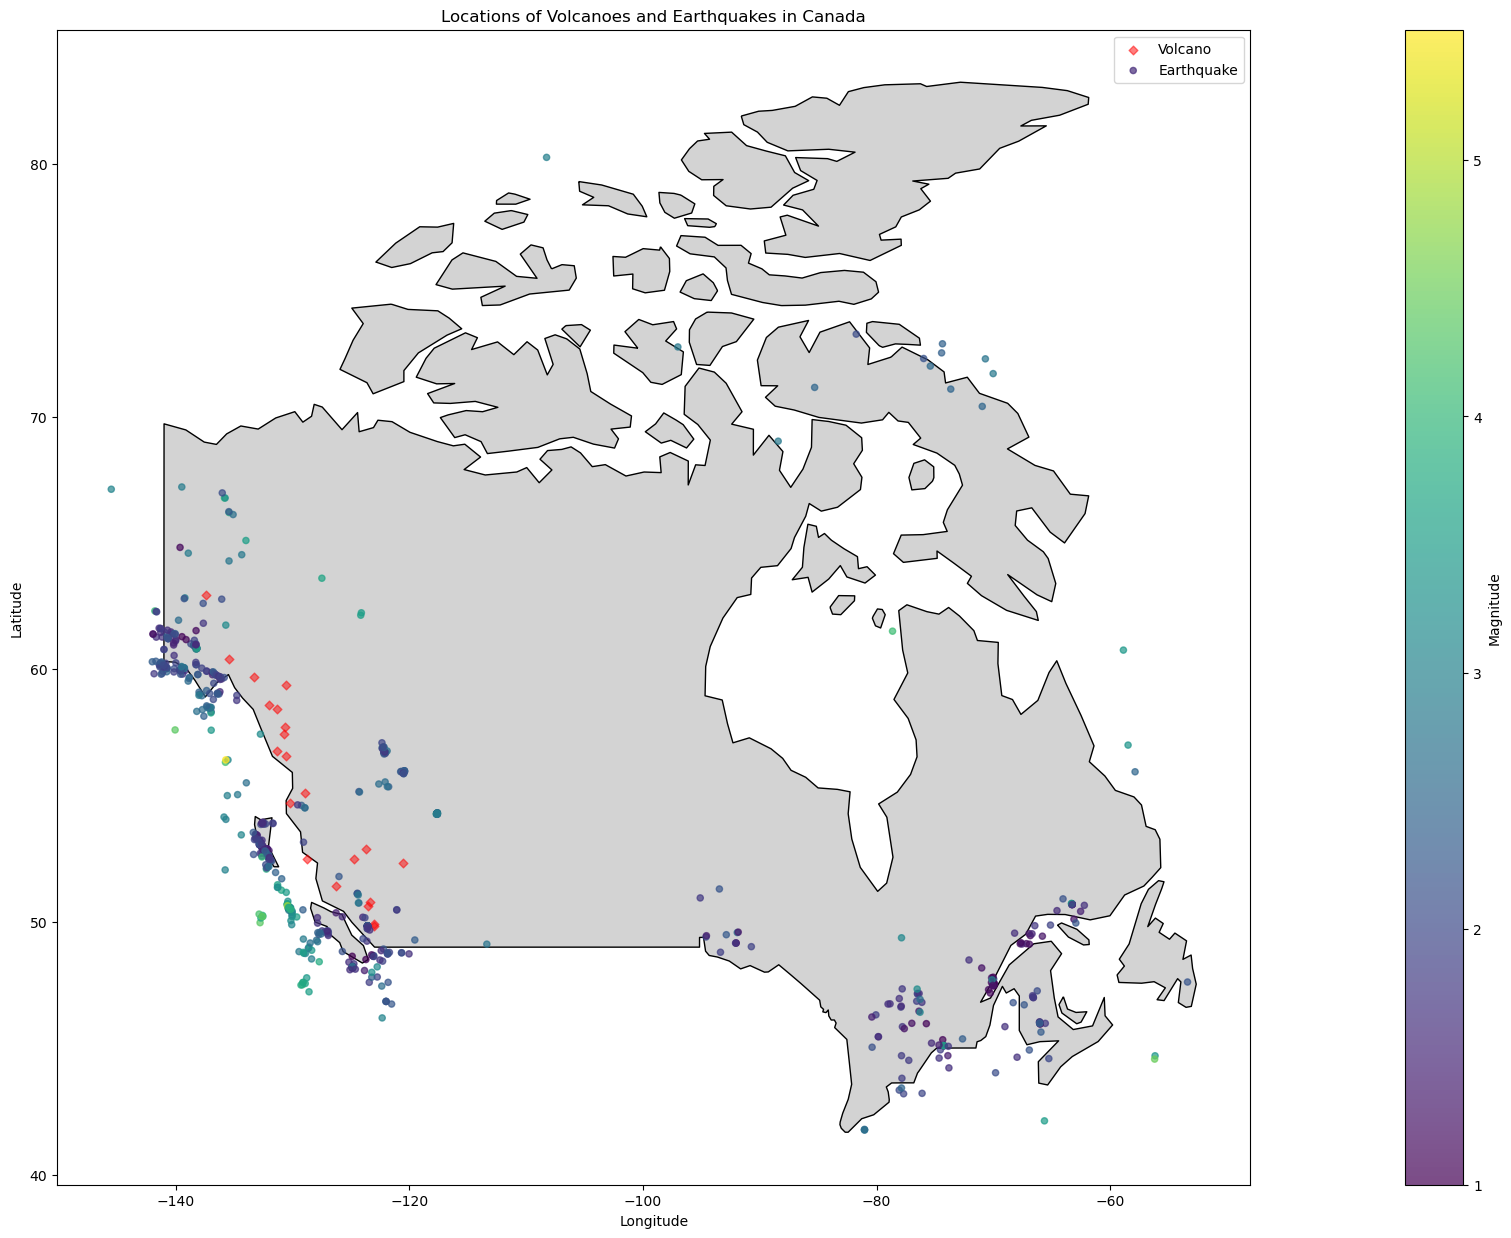

In [6]:
# Data is filtered to show volcanoes in Canada
volcano = volcano[volcano['Country'].isin(['Canada'])]
 
# Data is filtered to show earthquakes (by magnitude) in Canada
earthquake_canada = earthquake[(earthquake['Magnitude'].notna())]

# Creating a map to show only Canada
map_NA = world[world['name'] == 'Canada']

# Creating the figure/axis
fig, ax = plt.subplots(figsize = (40,15))

# PLot the map of Canada 
map_NA.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotting red scatter dots for volcano locations on the Canada Map  
volcano.plot(ax= ax, kind= 'scatter', x='Longitude', y='Latitude', color='red', alpha= 0.5, label='Volcano', legend=True, marker='D')

# Plotting scatter dots with changing colours based on earthquake magnitude on the Canada Map  
earthquake_canada.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', c='Magnitude', cmap='viridis', alpha=0.7, label='Earthquake', legend=True)

# Set the title & X, Y Labels of the graph 
ax.set_title('Locations of Volcanoes and Earthquakes in Canada')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show 
plt.show()